# Python Data Viz 101

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import random

## *Guide/Overview: All Basic Graphs and Data Viz*

## Evolution

### Line chart

**Notes & Resources/Links:**  
- *A line chart displays the evolution of one or several numeric variables. It is often used to represend time series.*
- https://www.data-to-viz.com/graph/line.html
- https://python-graph-gallery.com/line-chart/
- https://python-charts.com/evolution/line-chart-plotly/
- https://python-charts.com/evolution/line-plot-matplotlib/
- https://python-charts.com/evolution/lineplot-seaborn/
- https://docs.bokeh.org/en/latest/docs/user_guide/basic/lines.html#ug-basic-lines
- Small multiples: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
- Advanced examples/tutorials/customizations:
    - Grouped linecharts in multiple panels: https://python-graph-gallery.com/web-multiple-lines-and-panels/
    - Multi panel highlighted lineplots: https://python-graph-gallery.com/web-highlighted-lineplot-with-faceting/
    - Highly customized small multiple line chart: https://python-graph-gallery.com/web-line-chart-small-multiple/
    - Time series with filled area and custom facetting: https://python-graph-gallery.com/web-time-series-and-facetting-with-matplotlib/

An example of a simple line chart using Matplotlib: the xG flow chart for a single game, based on Understat data.
See the code/tutorial here: https://www.kaggle.com/code/josegabrielgonzalez/understat-series-xg-flow-chart  
(*the caveat is that single-game xG is highly questionable and possibly kinda useless/meaningless*)

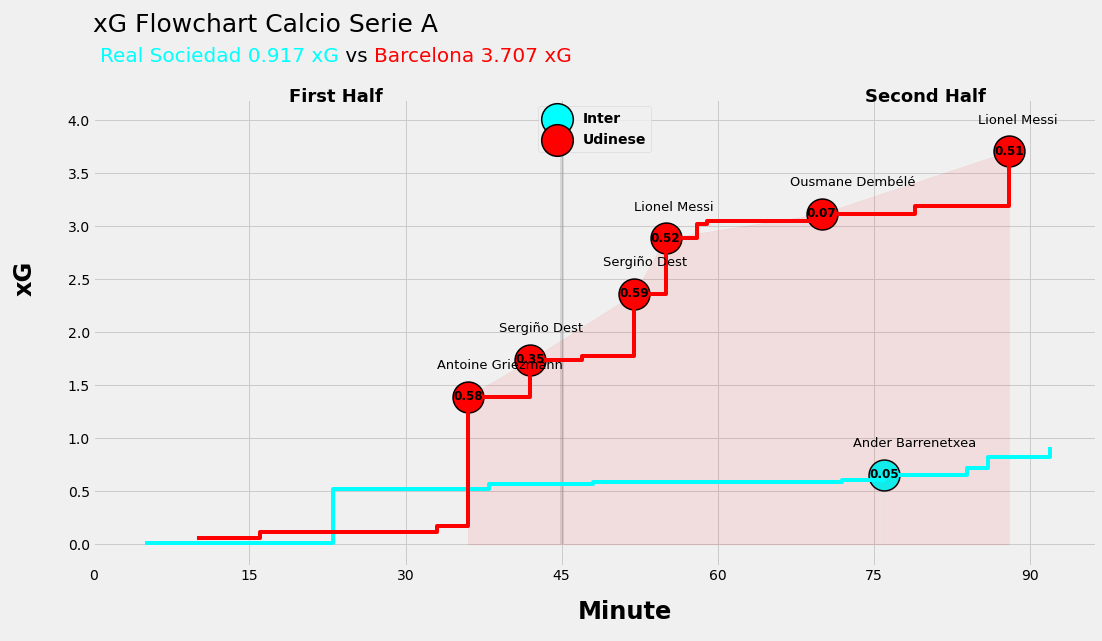

The next step is line charts with *multiple groups and/or variables*, and making *small multiple line charts*. This [example](https://python-graph-gallery.com/web-line-chart-small-multiple/) (adapted from [Gilbert Fontana's work](https://www.visualcapitalist.com/cp/charting-the-global-decline-in-consumer-confidence/) in Visual Capitalist) includes both aspects (i.e. multiple groups, and small multiple format):

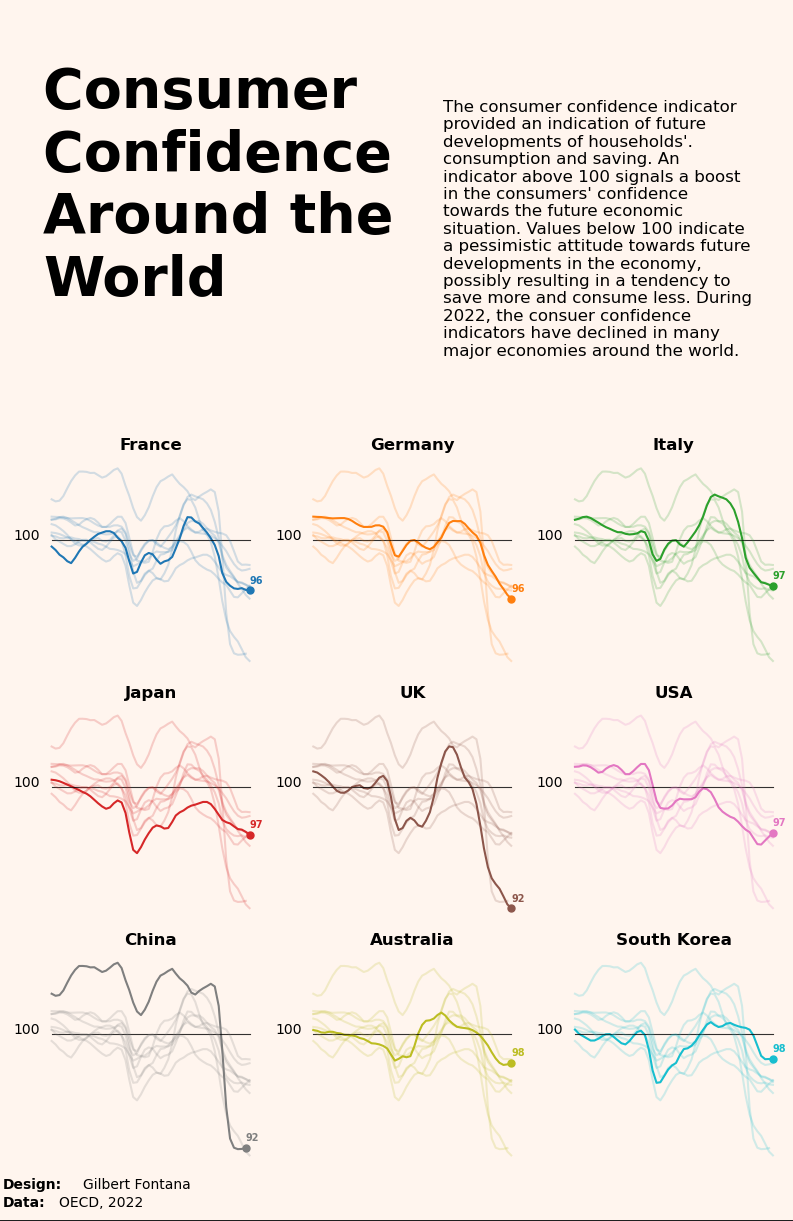

I'm obviously not getting into all the details here (see link), but here is the basic notions behind it. First, this multi-group line chart ([tutorial link](https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_PointsMovingAverage.html)) shows the moving average of Man Utd's points since 16/17 compared to other big 6 clubs in the Premier League: 

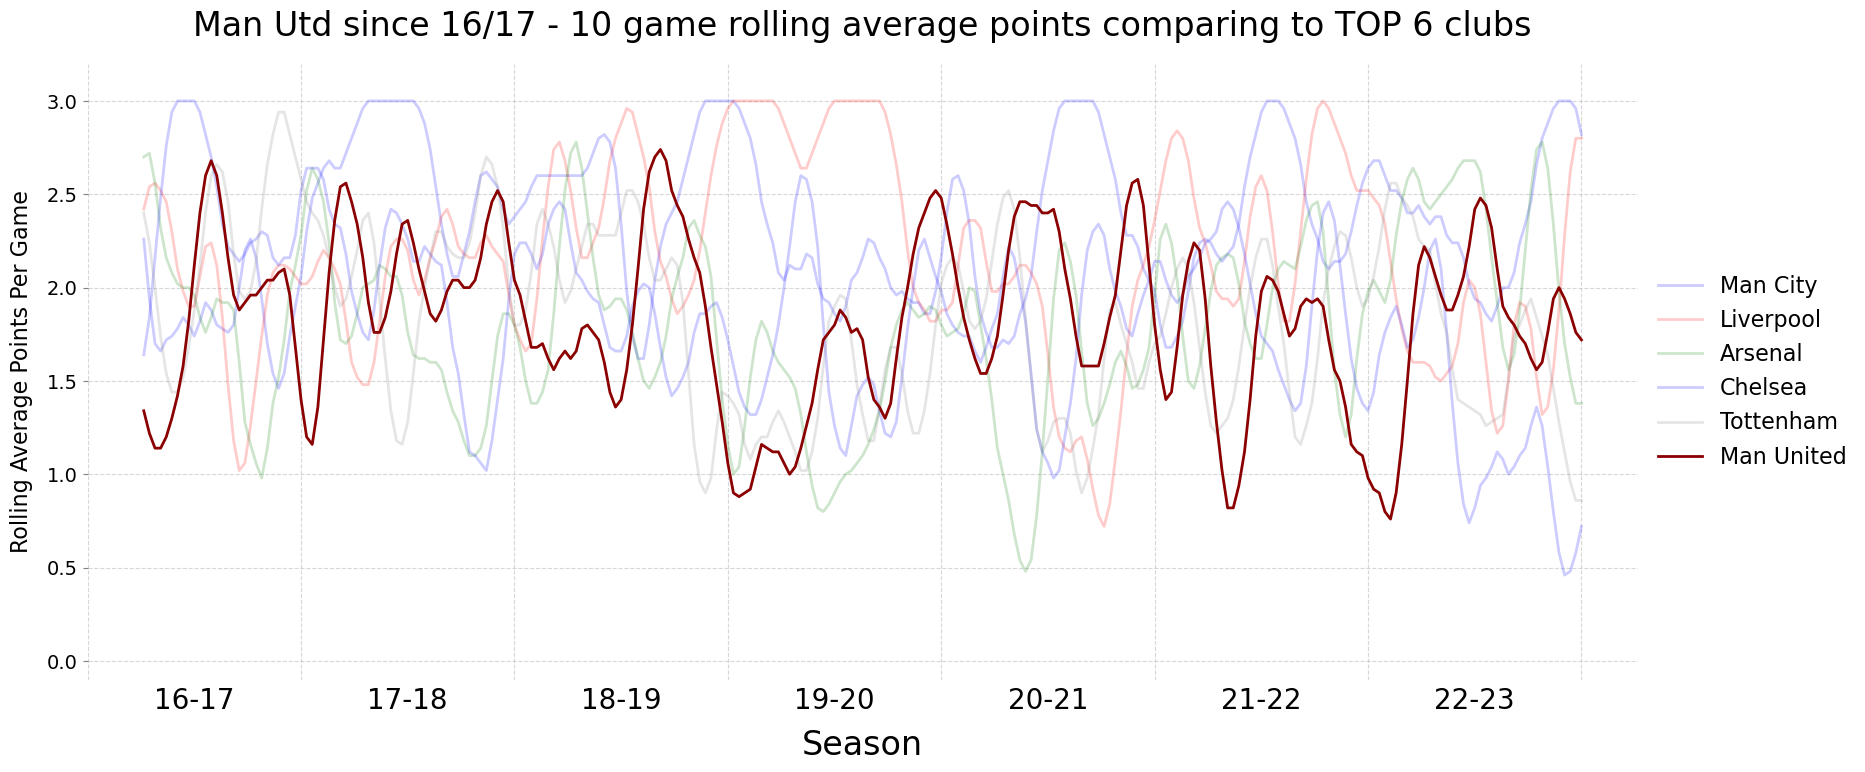

In [5]:
#####importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#####downloading data
#list of dataframes
dflist = []
#list of all seasons, we'll use them later
seasonst = []
#taking to last year because United hasn't played yet when I'm doing this code
for year in range(16,23,1):
    #create a string with season name
    if year<9:
        yeartext='0'+str(year)+'0'+str(year+1)
        yeartext2='0'+str(year)+'-0'+str(year+1)
    elif year==9:
        yeartext='0910'
        yeartext2='09-10'
    else:
        yeartext=str(year)+str(year+1)
        yeartext2=str(year)+'-'+str(year+1)
    #get data from webpage
    performance_year = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+yeartext+"/E0.csv",delimiter=',') 
    #append season name
    seasonst.append(yeartext2)
    #make list of dataframes
    dflist.append(performance_year)
#put dataframes into one big
performance = pd.concat(dflist).reset_index()

#####preparing the data
#top6 teams
teams = ['Man City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham', 'Man United']
#dictionary to store data
team_dfs = dict()
for team in teams:
    #empty dataframe
    team_df = pd.DataFrame(columns = ["Points", "Date", "Game"])
    #get matches by this team 
    matches = performance.loc[(performance['AwayTeam'] == team) | (performance['HomeTeam'] == team)]
    #auxilliary variable that will be helpful to plot
    game = 0
    for i, match in matches.iterrows():
        game +=1
        #if team was away
        if match['AwayTeam'] == team:
            #get goals for both teams 
            goalsfor = match['FTAG']
            goalsagainst = match['FTHG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'A':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            #geat goals for both teams
            goalsfor = match['FTHG']
            goalsagainst = match['FTAG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'H':
                points = 3
            elif match['FTR'] == 'D':
                points = 1      
            else:
                points = 0
                #assign value to dataframe
        team_df.at[i, "Points"] = points
        team_df.at[i, "Game"] = game
    #calculate rolling average   
    team_df['PointsRA'] = team_df['Points'].rolling(window=10, win_type='triang').mean()
    #append df
    team_dfs[team] = team_df


#####Plotting the chart    
#create plot 
fig, ax = plt.subplots(figsize=(20, 8))
#arsenal got yellow because of those 2004 kits, but it was invisible so they got green  
colors = ['blue', 'red', 'green', 'blue', 'grey', 'darkred']
#city highlighted more
alphas = [0.2, 0.2, 0.2, 0.2, 0.2, 1]
for club, color, alpha in zip(teams, colors, alphas):
    ax.plot(team_dfs[club]['Game'],  team_dfs[club]['PointsRA'], linewidth=2, linestyle='-',color=color, alpha = alpha, zorder = 2, label = club)
#set title
ax.set_title("Man Utd since 16/17 - 10 game rolling average points comparing to TOP 6 clubs", fontsize = 24, pad=20)
#add axis labels
ax.set_ylabel('Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Season', fontsize = 24, labelpad=10)
#make legend
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
#disable black ticks, but big text xaxis
ax.tick_params(axis='x', color='white', which='both', labelsize = 20)
#grey y ticks
ax.tick_params(axis='y', color='grey', labelsize = 14)
#add grid
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#make visible ticks for beginning of each season
ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']) + 38, 38))
#no text
ax.set_xticklabels([])
#make ticks in the middle
ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']), 38) + 19, minor=True)
#put season text in the middle of season
ax.set_xticklabels(seasonst, minor=True)
#set axis limits
ax.set_xlim(0, max(team_dfs["Liverpool"]['Game']) + 10)
ax.set_ylim(-0.1,3.2)

plt.show()

And here's an example of which adds 'small multiple' as well: 

In [6]:
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })

In [7]:
df

x        y1        y2         y3         y4        y5         y6  \
0   1  1.267848  0.486140  11.749772   3.848419  5.331572   2.403302   
1   2 -0.232310  1.583217  12.936219   7.821409  5.289631   3.903106   
2   3  0.269609  2.292340  11.313174   9.551207  4.974529   3.336772   
3   4  0.139087  4.182578  15.236984   8.986880  5.688421   5.385292   
4   5 -0.455762  5.644406  14.469920   9.833479  6.769400   5.802727   
5   6  0.904049  5.264415  16.951763  10.538667  9.594872   5.512679   
6   7 -0.637724  8.523348  16.302227  11.811414  8.686536   8.884213   
7   8  1.238119  7.583099  18.573679  11.613920  7.788893   8.017812   
8   9  1.152288  9.006655  18.778728  14.164061  4.003609  10.081825   
9  10  0.471619  8.361552  21.155417  15.773046  5.311740  11.148744   

          y7         y8         y9  
0   3.844433   5.410798   3.406003  
1   5.660442   6.125178   4.133727  
2   7.502639   5.700081   6.917131  
3   9.674537   6.968558   7.041076  
4  11.765582   7.814528   7.724632  
5   9.912167   8.407108   8.636243  
6  12.192416  11.235175   8.439924  
7  12.867928  11.423641  10.925106  
8  14.558781  10.814397  11.976086  
9  15.822137  13.678747  12.989715

C:\Users\Al Raven\AppData\Local\Temp\ipykernel_23000\767399173.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


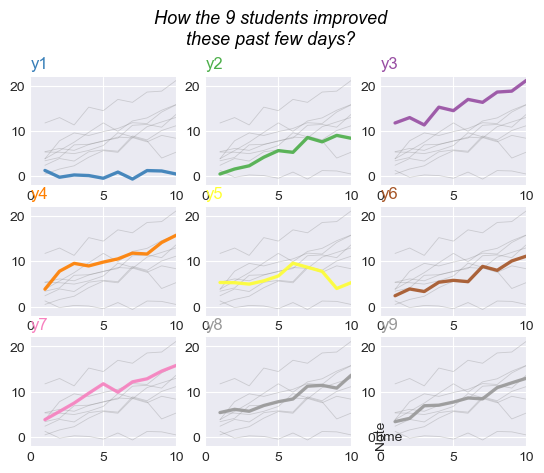

In [8]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every group, but discrete
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

The interest/benefit of using methods like small multiples and/or highlighting one or more lines when there's multiple groups/variables, is to avoid ending up with a ["spaghetti plot"](https://python-graph-gallery.com/124-spaghetti-plot/) (see also this [note](https://www.storytellingwithdata.com/blog/2013/03/avoiding-spaghetti-graph) by Cole Nussbaumer Knaflic) which is hard to read and provides fewer insights.

### Area chart

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/area.html
- https://python-charts.com/evolution/stacked-area-plot-matplotlib/
- https://python-charts.com/evolution/area-plot-matplotlib/

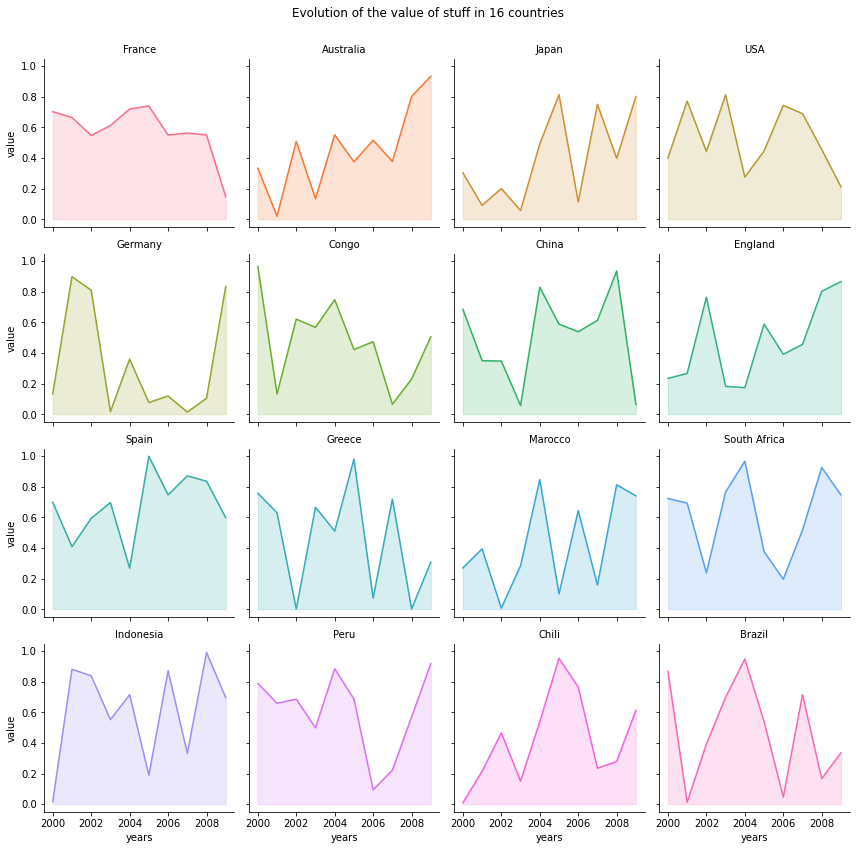

### Stacked area

**Notes & Resources/Links:**  
- *A stacked area chart displays the evolution of a numeric variable for several groups of a dataset. Each group is displayed on top of each other, making it easy to read the evolution of the total, but hard to read each group value accurately. In python, stacked area charts are mainly done thanks to the stackplot() function*
- *Stacked area charts must be used with care since they suffer a number of caveats. They are appropriate to study the evolution of the whole and the relative proportions of each group, but not to study the evolution of each individual group. For instance, it is pretty hard to understand how the green group evolves on the chart below.*
- https://www.data-to-viz.com/graph/stackedarea.html
- https://python-graph-gallery.com/stacked-area-plot/

- [Stacked line chart with inline labels](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)

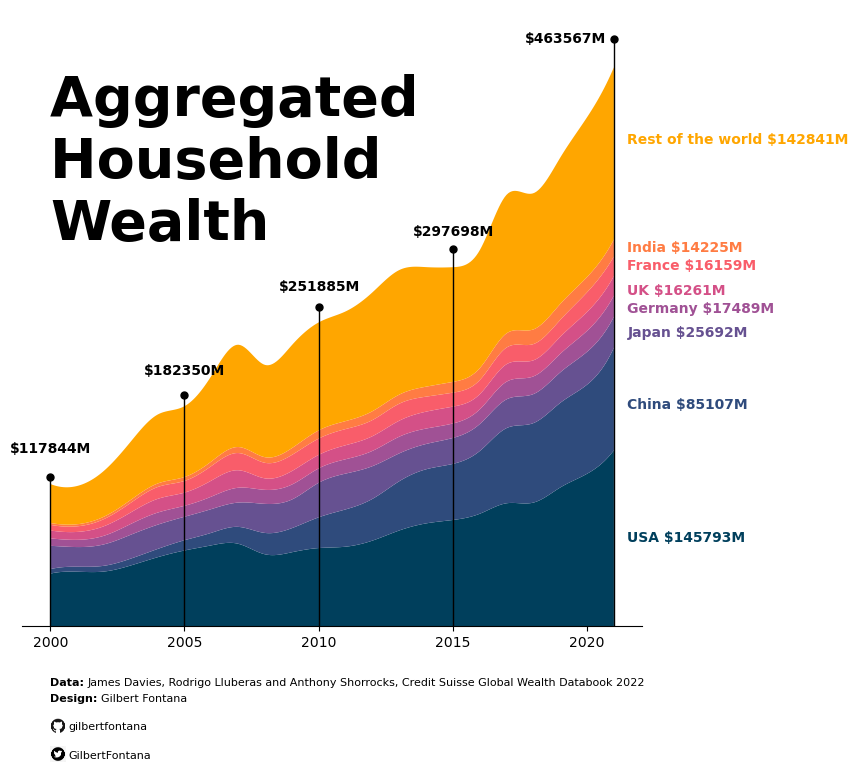

### Calendar chart/heatmap

**Notes & Resources/Links:**  
- https://python-charts.com/evolution/calendar-heatmap-matplotlib/

Sample data = each day between 2020-01-01 and 2023-06-30 is represented by a single value

In [9]:
import numpy as np; np.random.seed(1)
import pandas as pd

# Sequence of dates
days = pd.date_range('01/01/2020', periods = 1277, freq = 'D')

# Pandas time series with random data for each day
values = pd.Series(np.random.randn(len(days)), index = days)

In [10]:
values

2020-01-01    1.624345
2020-01-02   -0.611756
2020-01-03   -0.528172
2020-01-04   -1.072969
2020-01-05    0.865408
                ...   
2023-06-26   -0.312603
2023-06-27    0.101203
2023-06-28   -1.111818
2023-06-29   -1.186552
2023-06-30    1.623462
Freq: D, Length: 1277, dtype: float64

In [11]:
pip install calplot

In [12]:
import calplot
import matplotlib.pyplot as plt

calplot.calplot(values,
            suptitle = 'Calendar',#add chart title
            suptitle_kws = {'x': 0.5, 'y': 1.0},#customizing the title
            cmap = 'winter',#color palette of the heatmap
            fillcolor='darkgreen',#color of the missing values
            linecolor='orange',#color of lines dividing the days
            linewidth='1.3',
            edgecolor='black',#color of lines dividing the months
            daylabels = ['Lundi','Mardi','Mercredi',
            'Jeudi','Vendredi','Samedi','Dimanche'],
            monthlabels = ['Janvier','Février','Mars',
            'Avril','Mai','Juin','Juillet','Août',
            'Septembre','Octobre','Novembre','Décembre'],
            yearlabel_kws = {'fontsize': 15, 'color': 'black'})#customizing year labels
# plt.show() 


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x680 with 5 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.


Error in callback <function _draw_all_if_interactive at 0x0000027736462840> (for post_execute):


TypeError: must be real number, not str

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


TypeError: must be real number, not str

<Figure size 1250x680 with 5 Axes>

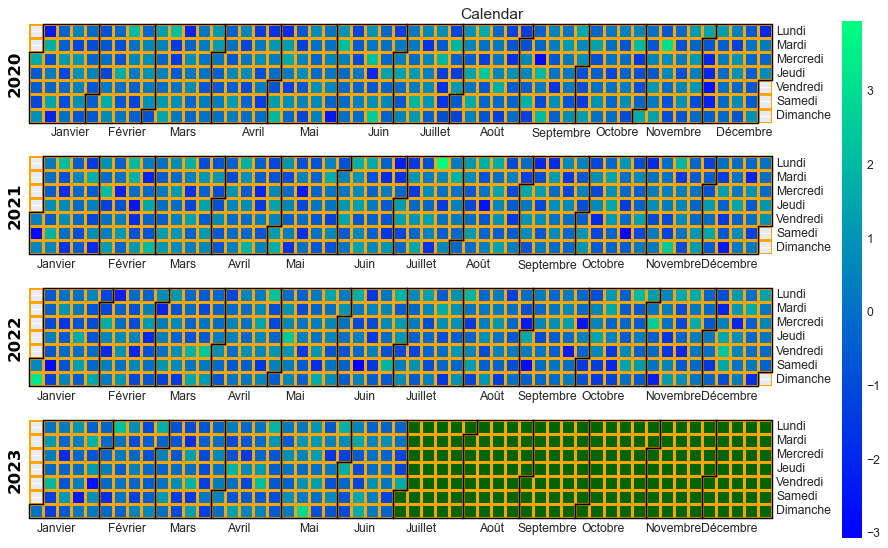

### Gantt chart

**Notes & Resources/Links:**  
- https://python-charts.com/evolution/gantt-chart-plotly/

In [13]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task = "Task A", Start = '2013-09-05', End = '2013-10-25', Assigned = "Person A", Difficulty = 70),
    dict(Task = "Task B", Start = '2013-12-03', End = '2014-02-14', Assigned = "Person A", Difficulty = 20),
    dict(Task = "Task C", Start = '2013-10-20', End = '2014-03-17', Assigned = "Person B", Difficulty = 30),
    dict(Task = "Task D", Start = '2014-02-21', End = '2014-07-06', Assigned = "Person A", Difficulty = 50),
    dict(Task = "Task E", Start = '2014-06-20', End = '2014-09-28', Assigned = "Person B", Difficulty = 80)
])

fig = px.timeline(df, x_start = "Start", x_end = "End", y = "Task",
                  color = "Difficulty", color_continuous_scale = "viridis")
# Tasks from top to bottom
fig.update_yaxes(autorange = "reversed") 
fig.show()

### Streamgraph

**Notes & Resources/Links:**  
- *A streamgraph is a variation of the stacked area graph. It displays the evolution of a numeric value for several groups. Each group is displayed around a central axis and edges are rounded resulting in a flowing and organic shape.*
- https://www.data-to-viz.com/graph/streamgraph.html
- https://python-graph-gallery.com/streamchart/
- advanced example/tutorial: https://python-graph-gallery.com/web-streamchart-with-matplotlib/

Chris Claremont's X-Men comics exploration with streamcharts in Matplotlib:

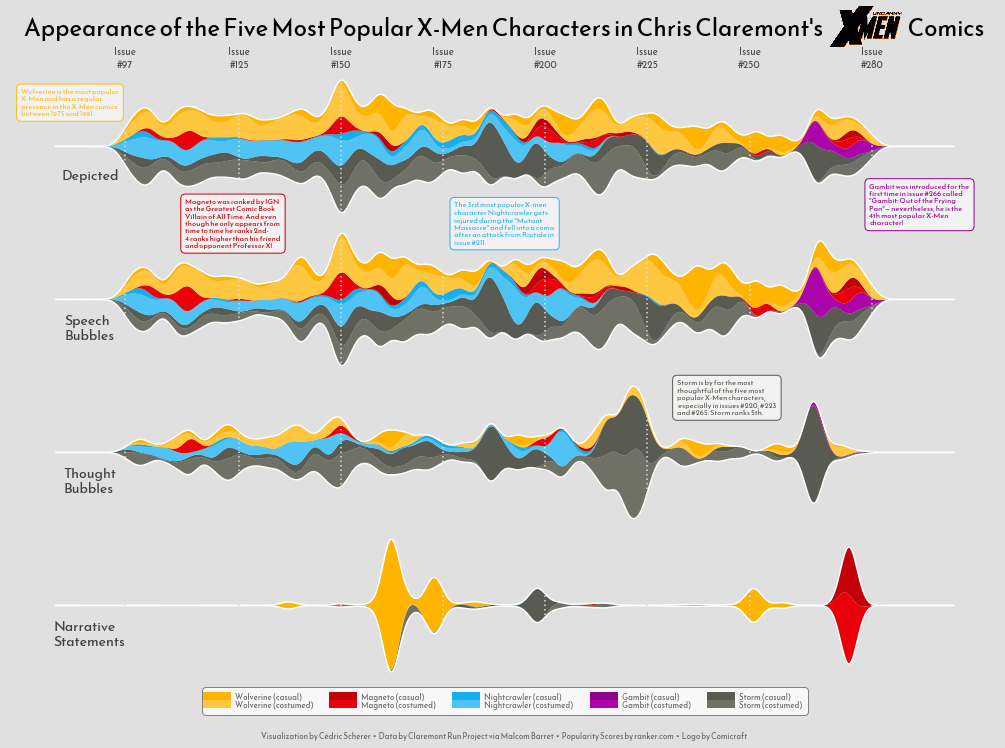

### Candlestick

**Notes & Resources/Links:**  
- *A candlestick chart is a style of financial chart used to describe price movements of a security, derivative, or currency. In python there are 2 main ways to build a candlestick chart. The mplfinance package is built on top of matplotlib and is great to create static versions. Plotly has a specific function to create interactive candlestick charts.*
- https://python-graph-gallery.com/candlestick/

In [14]:
pip install mplfinance

In [15]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


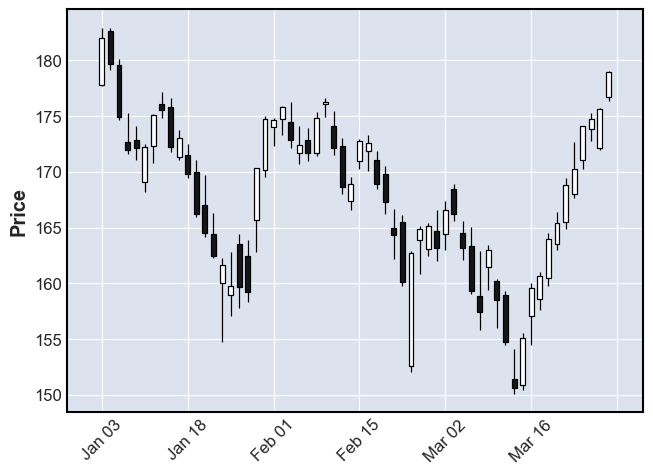

In [16]:
#libraries
import mplfinance as mpf
import yfinance as yf #(for the dataset)

# Define the stock symbol and date range
stock_symbol = "AAPL"  # Example: Apple Inc.
start_date = "2022-01-01"
end_date = "2022-03-30"

# Load historical data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# plot
mpf.plot(stock_data, type='candle')

### Timeseries charts

**Notes & Resources/Links:**  
- *Timeseries charts refer to all charts representing the evolution of a numeric value. Line chart, streamgraph, barplot, area chart: they all can be used for timeseries visualization.*
- https://python-graph-gallery.com/timeseries/

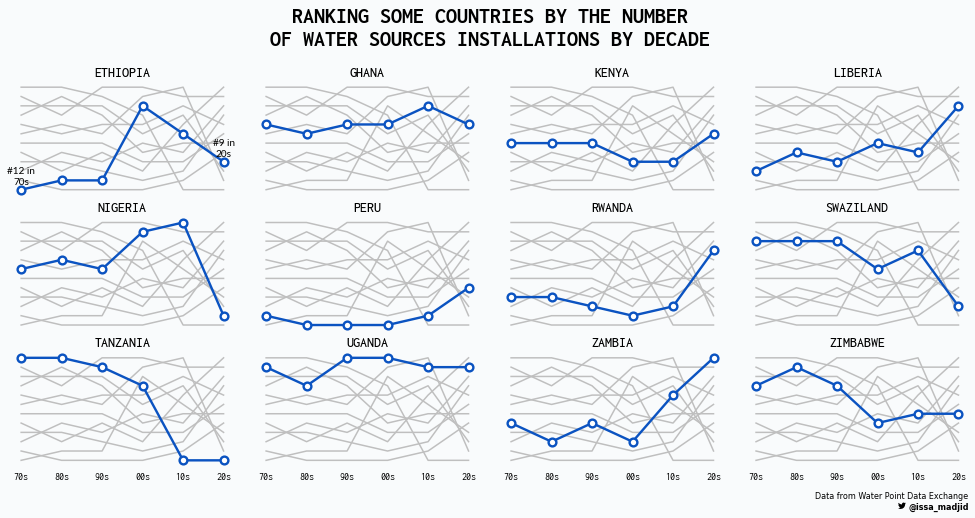

***

## Map/Spatial

### Background Map

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/map.html
- https://python-graph-gallery.com/map/

***Input format and package overview***  
A map is basically a set of polygons displayed on a 2 dimensional canvas. There are two problems you need to solve when building one:
- Where to find polygon coordinates. It can come from:
    - a shape file or a geoJson file. That's 2 different ways to store the information. The geopandas package is the best way to read those file formats with Python.
    - a python library like geopandas or basemap providing the information for common location like the US.
    - google map or open street map.
- How to plot those polygons?
    - Once you get a geodataframe thanks to the geopandas package, geoplot is your best choice to build a static map
    - If you need an interactive map from a geodataframe, plotly is a good option.
    - If you want to use google map style maps, folium is the way to go.
- https://kepler.gl/

### Choropleth map

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/choropleth.html
- https://python-graph-gallery.com/choropleth-map/
- https://python-charts.com/spatial/choropleth-map-plotly/

### Hexbin map

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/hexbinmap.html
- https://python-graph-gallery.com/hexbin-map/

### Spatial Heat Map

**Notes & Resources/Links:**  
- https://python-charts.com/spatial/spatial-heatmap-plotly/

### Cartogram

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/cartogram.html
- https://python-graph-gallery.com/cartogram/

### Connection map

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/story/MapConnection.html
- https://python-graph-gallery.com/connection-map/

### Bubble map

**Notes & Resources/Links:**  
- https://www.data-to-viz.com/graph/bubblemap.html
- https://python-graph-gallery.com/bubble-map/
- https://python-charts.com/spatial/bubble-map-plotly/

### Interactive leaflet maps

**Notes & Resources/Links:**  
- https://python-charts.com/spatial/interactive-maps-folium/

***

## Flow

### Chord Diagram

**Notes & Resources/Links:**  
- *A chord diagram represents flows or connections between several entities (called nodes). Each entity is represented by a fragment on the outer part of the circular layout. Then, arcs are drawn between each entities. The size of the arc is proportional to the importance of the flow.*
- Here are the options/libraries to make chord diagrams in Python: the *chord* library, *Bokeh*, *Plotly* and the *mne* library.
- https://www.data-to-viz.com/graph/chord.html
- https://python-graph-gallery.com/chord-diagram/
- https://plotly.com/python/v3/filled-chord-diagram/
- http://holoviews.org/reference/elements/bokeh/Chord.html

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
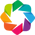

In [17]:
# libraries
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

# Should the diagram be plotted with 'bokeh' or 'matplotlib'?
hv.extension('bokeh')
# How large should be the diagram?
hv.output(size=300)

# Data set
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
links = pd.DataFrame(data['links'])

# Chord diagram
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

# Not needed in a jupyter notebook
# It shows the diagram when run in another IDE or from a python script:
from bokeh.plotting import show
show(hv.render(chord))

### Network chart

**Notes & Resources/Links:**  
- *A Network diagram (or chart, or graph) show interconnections between a set of entities. Each entity is represented by a node (or vertices). Connection between nodes are represented through links (or edges). This section mainly focuses on NetworkX, probably the best library for this kind of chart with python.*
- https://www.data-to-viz.com/graph/network.html
- https://python-graph-gallery.com/network-chart/
- https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
- https://plotly.com/python/network-graphs/
- https://webcache.googleusercontent.com/search?q=cache:https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01
- Football passing networks: 
    - https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_pass_network.html#sphx-glr-gallery-pitch-plots-plot-pass-network-py
    - https://github.com/Friends-of-Tracking-Data-FoTD/passing-networks-in-python
    - https://www.dzialowski.eu/football-data-visualisations/

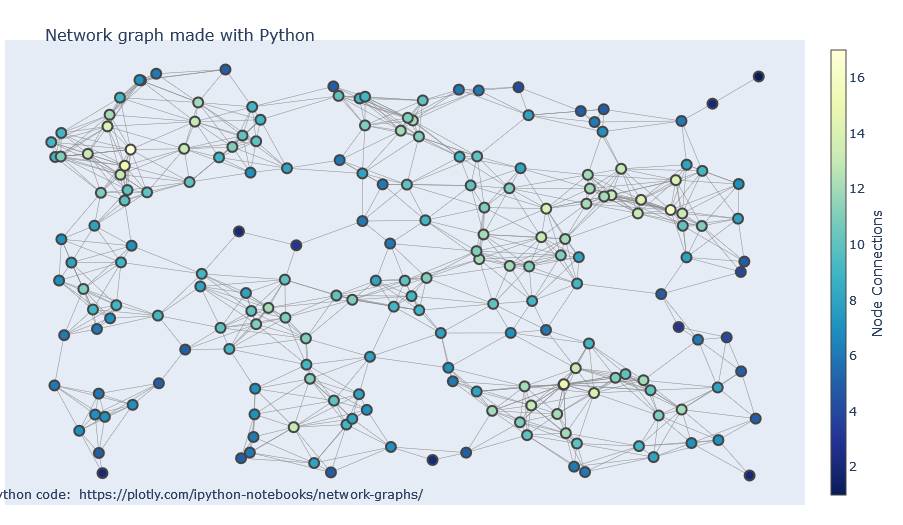

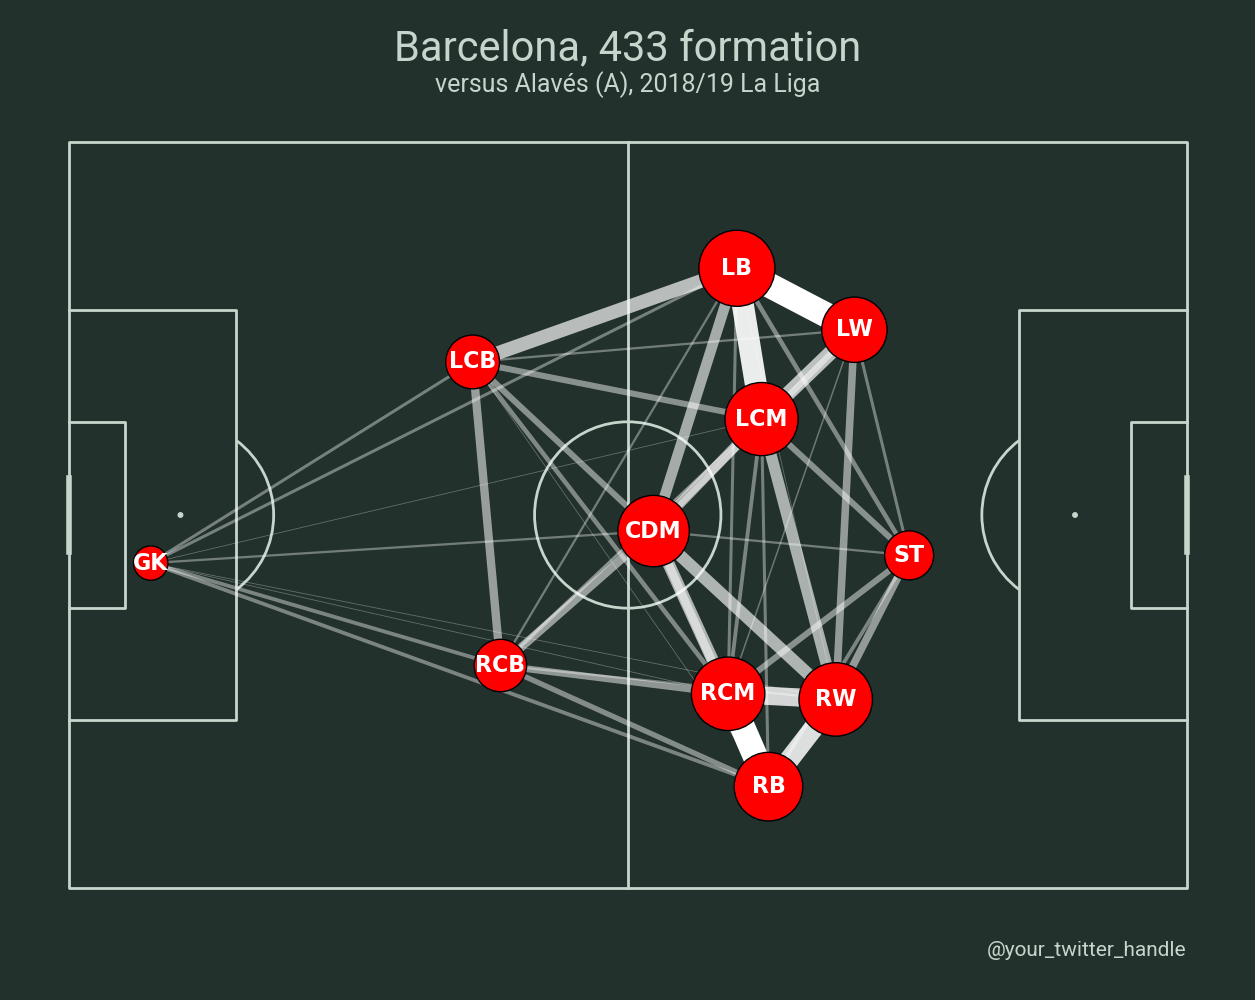

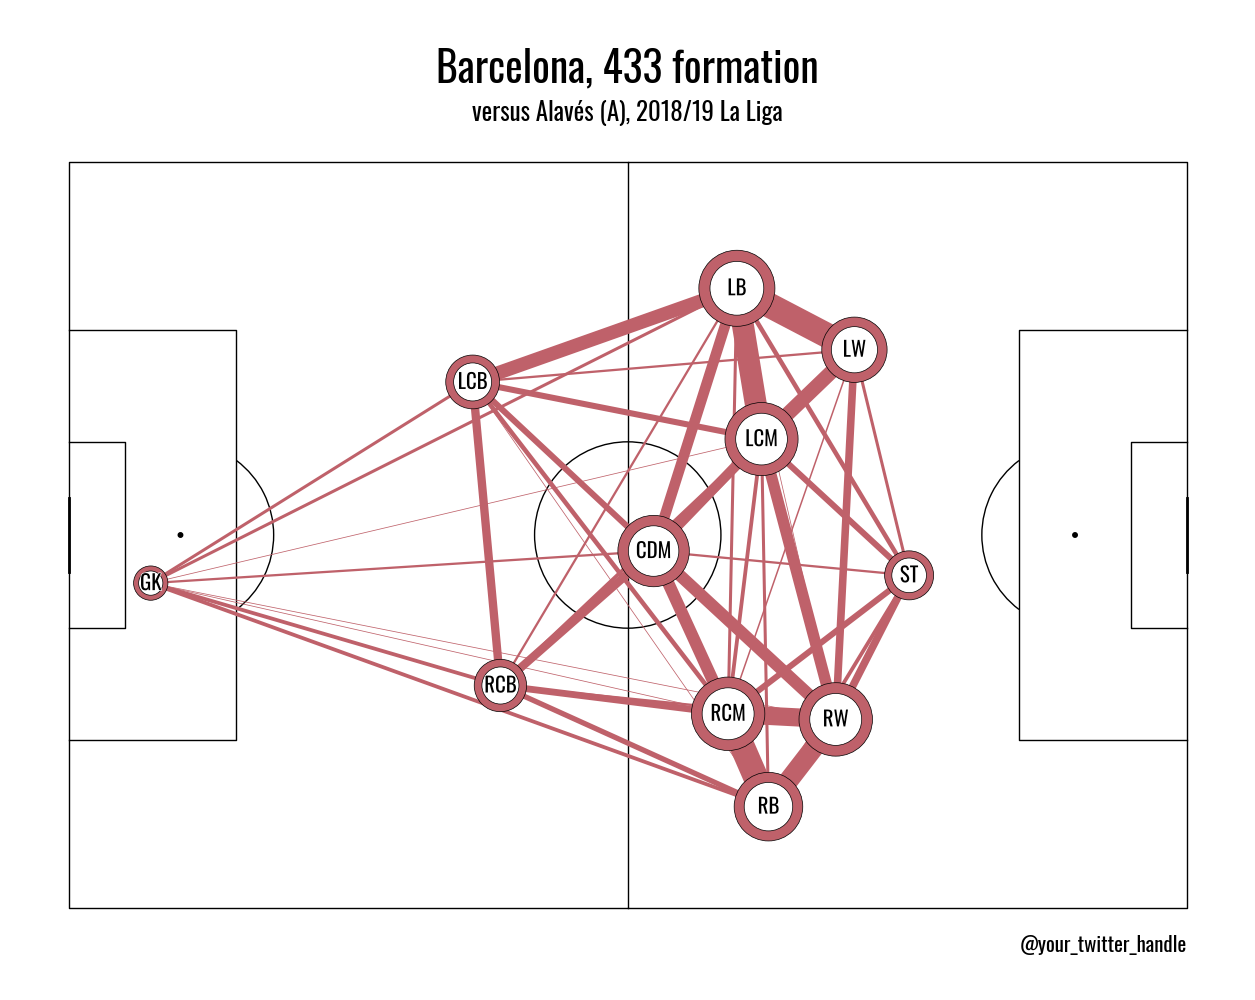

### Sankey diagram

**Notes & Resources/Links:**  
- *A Sankey Diagram is a visualisation technique that allows to display flows. Several entities (nodes) are represented by rectangles or text. Their links are represented with arrows or arcs that have a width proportional to the importance of the flow.*
- Options: Matplotlib, Plotly, pySankey
- https://www.data-to-viz.com/graph/sankey.html
- https://plotly.com/blog/sankey-diagrams/
- https://python-graph-gallery.com/sankey-diagram/
- https://towardsdatascience.com/sankey-diagram-basics-with-pythons-plotly-7a13d557401a
- https://matplotlib.org/api/sankey_api.html
- https://matplotlib.org/stable/gallery/specialty_plots/sankey_basics.html
- https://plotly.com/python/sankey-diagram/
- https://plotly.com/blog/sankey-diagrams/

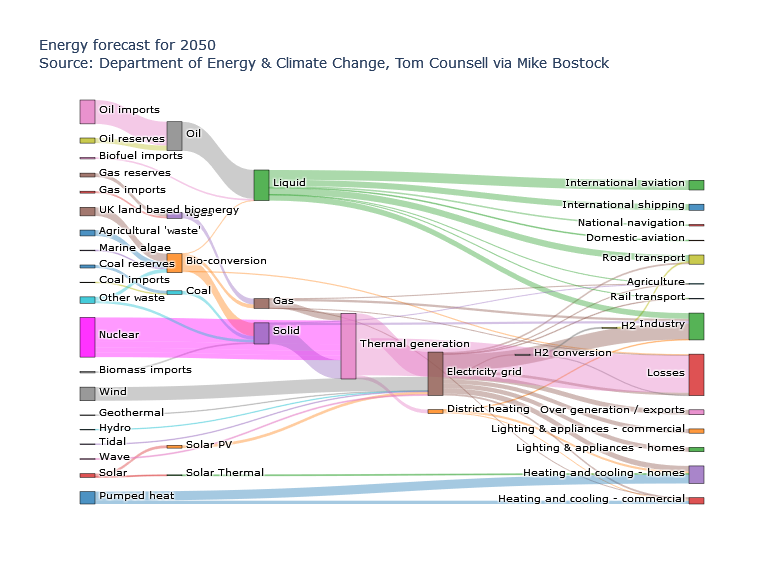

### Arc Diagram

**Notes & Resources/Links:**  
- *There are currently no options in Python for it*
- https://www.data-to-viz.com/graph/arc.html
- https://python-graph-gallery.com/arc-diagram/

### Edge Bundling

**Notes & Resources/Links:**  
- *There are currently no options in Python for it*
- https://www.data-to-viz.com/graph/edge_bundling.html
- https://python-graph-gallery.com/hierarchical-edge-bundling/

***

**Animation**: https://python-graph-gallery.com/animation/  
**3D Plotting**: https://python-graph-gallery.com/3d/  
**Statistical Analysis**: https://python-graph-gallery.com/statistics/
- the basics of statistical modelling in football (using Python) are explained by David Sumpter in his classic [Soccermatics course](https://soccermatics.readthedocs.io/en/latest/).
- see also:
    - the [Mplsoccer guide/tutorial](https://mplsoccer.readthedocs.io/en/latest/)
    - [Tuan Nguyen Doan's Matplotlib and Seaborn tutorial](https://webcache.googleusercontent.com/search?q=cache:https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b); [Jupyter notebook](https://github.com/tuangauss/Various-projects/blob/master/Python/football_visual.ipynb)
    - Friends of Tracking: [Github](https://github.com/Friends-of-Tracking-Data-FoTD), [Youtube](https://www.youtube.com/@friendsoftracking755)
    - McKay Johns: [Youtube](https://www.youtube.com/@McKayJohns), [Github](https://github.com/mckayjohns/youtube-videos).
    - Ben Griffis: [Youtube](https://www.youtube.com/@BenGriffis), [Github](https://github.com/griffisben/Soccer-Analyses/).
    - [FC Python](https://fcpython.com/)
    - Edd Webster's [Football Analytics Collection/Guide](https://github.com/eddwebster/football_analytics)
    - More [Mplsoccer tutorials](https://mplsoccer.readthedocs.io/en/latest/gallery/index.html)